In [25]:
import pandas as pd
from pandasql import sqldf

In [26]:
dfs = []
for i in range(263):
    dfs.append(pd.read_csv("../reports/results/range_name_{}.csv".format(str(i).zfill(3))).drop(["Unnamed: 0"], axis=1))
df = pd.concat(dfs, axis=0)

In [27]:
df.head()


,flop,board_type,0b,1b,2b,profit
0,"[14, 14, 13]",two-tone,0,0,0,1.053372
1,"[14, 14, 13]",two-tone,1,1,1,1.684726
2,"[14, 14, 13]",two-tone,2,2,2,1.828984
3,"[14, 14, 13]",two-tone,3,2,2,2.109554
4,"[14, 14, 13]",two-tone,7,5,4,2.162975


In [28]:
df2 = sqldf("""select * from df a
        INNER JOIN (select flop, max(profit) AS max_profit from df group by 1) b on
        b.flop = a.flop and a.profit = b.max_profit
       order by 1 desc"""
      ,globals())
df2.to_csv("../reports/condensed_results/CO_RFI_vs_BN_call.csv")

In [30]:
df2.columns = ["_" + col for col in df2.columns]

In [34]:
sqldf("select _0b, _1b, _2b, count(*), max(_flop), min(_flop) from df2 group by 1,2,3 order by 4 desc" , globals())

,_0b,_1b,_2b,count(*),max(_flop),min(_flop)
0,1,1,1,100,"[14, 9, 6]","[11, 10, 7]"
1,2,2,2,43,"[14, 12, 8]","[11, 9, 7]"
2,1,0,0,27,"[14, 14, 8]","[11, 11, 2]"
3,1,0,1,20,"[14, 9, 4]","[12, 8, 2]"
4,1,2,1,10,"[12, 11, 4]","[11, 10, 4]"
5,8,6,4,8,"[14, 14, 13]","[14, 11, 11]"
6,1,1,2,7,"[14, 9, 7]","[12, 7, 4]"
7,3,2,2,7,"[14, 13, 9]","[12, 9, 9]"
8,8,6,3,6,"[14, 9, 9]","[12, 7, 7]"
9,3,2,3,5,"[14, 13, 7]","[14, 12, 7]"


/Users/petermyers/Desktop/Code/commons/venv/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1157c71d0> has a label of '_profit' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


AttributeError: 'AxesSubplot' object has no attribute 'show'

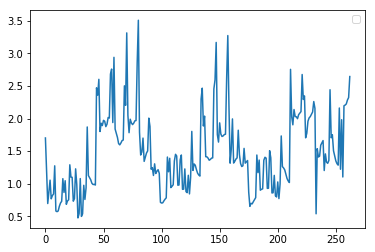

In [42]:
df2[["_profit"]].plot().show()

In [52]:
df.iloc[860:]

,flop,board_type,0b,1b,2b,profit
0,"[11, 10, 3]",two-tone,0,0,0,1.268397
1,"[11, 10, 3]",two-tone,1,1,1,2.176126
2,"[11, 10, 3]",two-tone,1,2,2,2.284376
0,"[11, 10, 2]",two-tone,0,0,0,1.315725
1,"[11, 10, 2]",two-tone,1,1,1,2.212852
2,"[11, 10, 2]",two-tone,1,2,2,2.321536
0,"[11, 9, 9]",two-tone,0,0,0,0.629701
1,"[11, 9, 9]",two-tone,1,1,1,1.324846
2,"[11, 9, 9]",two-tone,3,2,2,1.496702
3,"[11, 9, 9]",two-tone,5,4,3,1.589576
